In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("Clean Data of Si Andalan.csv")

In [39]:
df.info()
sns.set(style="whitegrid")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    787 non-null    int64  
 1   tanggal               787 non-null    object 
 2   kab                   787 non-null    object 
 3   kec                   787 non-null    object 
 4   kel                   787 non-null    object 
 5   kk                    787 non-null    int64  
 6   jiwa                  787 non-null    float64
 7   meninggal             787 non-null    int64  
 8   hilang                787 non-null    int64  
 9   luka                  787 non-null    int64  
 10  ungsi                 787 non-null    int64  
 11  ternak                787 non-null    int64  
 12  rb                    787 non-null    float64
 13  rs                    787 non-null    int64  
 14  rr                    787 non-null    float64
 15  tmdm                  7

In [40]:
if 'status' in df.columns and df['status'].notnull().sum() > 0:
    df['target'] = df['status']
else:
    # Alternatif: buat target berdasarkan terdampak
    df['target'] = df['terdampak'].apply(lambda x: 1 if x > 0 else 0)


<ipython-input-41-001f0e0ec055>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


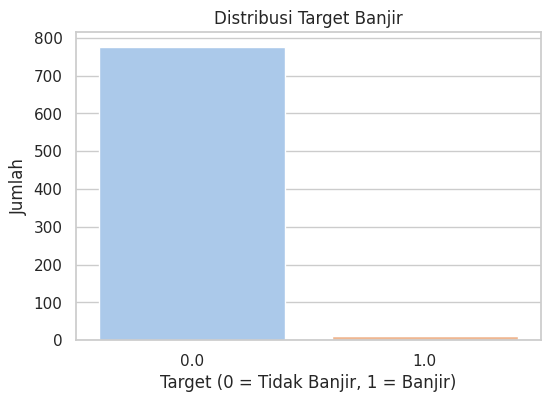

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Distribusi Target Banjir')
plt.xlabel('Target (0 = Tidak Banjir, 1 = Banjir)')
plt.ylabel('Jumlah')
plt.show()

Distribusi Target Banjir
*   Mayoritas data (lebih dari 98%) memmiliki target 0, yaitu tidak terjadi banjir.
*   Hanya sebagian sangat kecil (target =1) yang menunjukkan terjadi banjir.



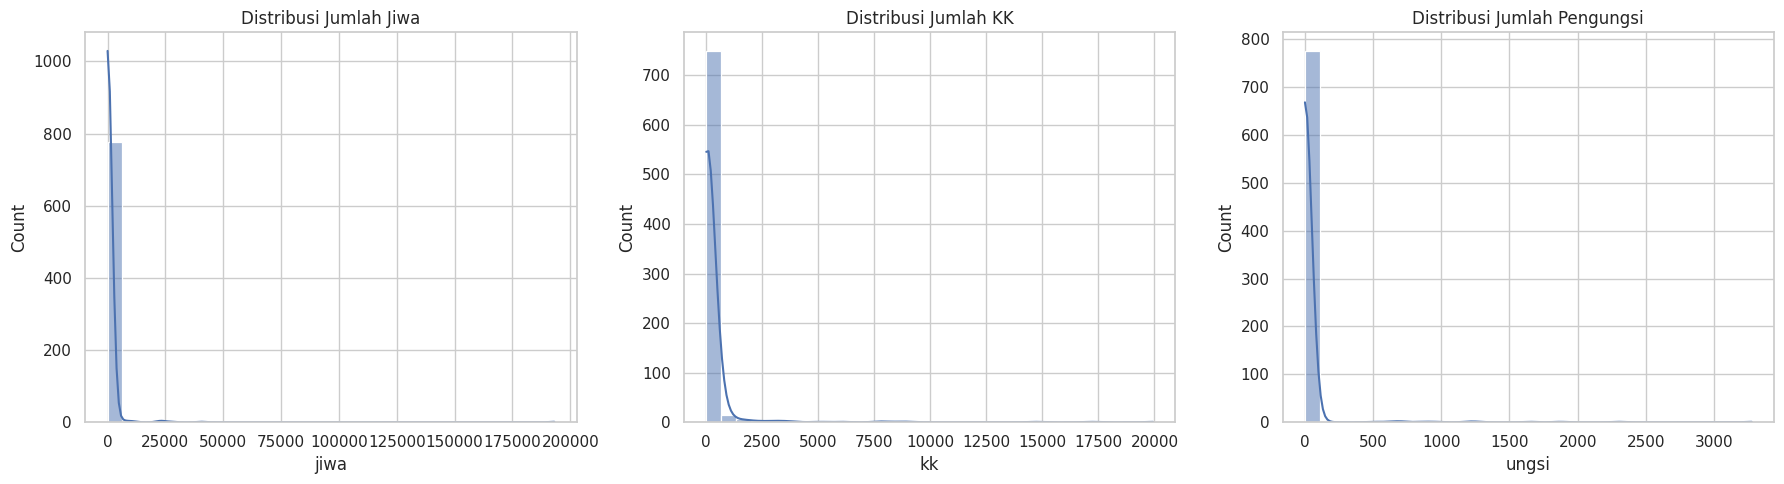

In [42]:
# Plot distribusi Jiwa, KK, dan Ungsi
plt.figure(figsize=(18, 5))

# Jumlah Jiwa
plt.subplot(1, 3, 1)
sns.histplot(df['jiwa'], kde=True, bins=30)
plt.title('Distribusi Jumlah Jiwa')

# Jumlah KK
plt.subplot(1, 3, 2)
sns.histplot(df['kk'], kde=True, bins=30)
plt.title('Distribusi Jumlah KK')

# Jumlah Pengungsi
plt.subplot(1, 3, 3)
sns.histplot(df['ungsi'], kde=True, bins=30)
plt.title('Distribusi Jumlah Pengungsi')

plt.tight_layout()
plt.show()

Distribusi Jumlah Jiwa
*   Sebagian besar wilayah terdampak memiliki jumlah jiwa yang relatif kecil (dibawah 5.000 jiwa)
*   Distribusi sangat right-skewed, menunjukkan adanya outlier besar (wilayah padat penduduk).
*   Terdapat beberap kasus esktrem (hingga >100.00 jiwa), kemungkinan ini wilayah kota besar atau agregat data.

Distribusi Jumlah KK
*   Pola serupa dengan jumlah jiwa: mayoritas berada di rentang rendah (di bawah 1.000 kk).
*   Terdapat outlier di atas 10.000 KK, yang berpotensi mewakili kecamatan atau kelurahan besar.

Distribusi Jumlah Pengungsi
*   Sebagian besar kejadian hanya berdampak pada ratusan pengungsi.
*   Distribusi sangat skewed juga, yang menunjukkan ada beberapa kejadian besar evakuasi massal.










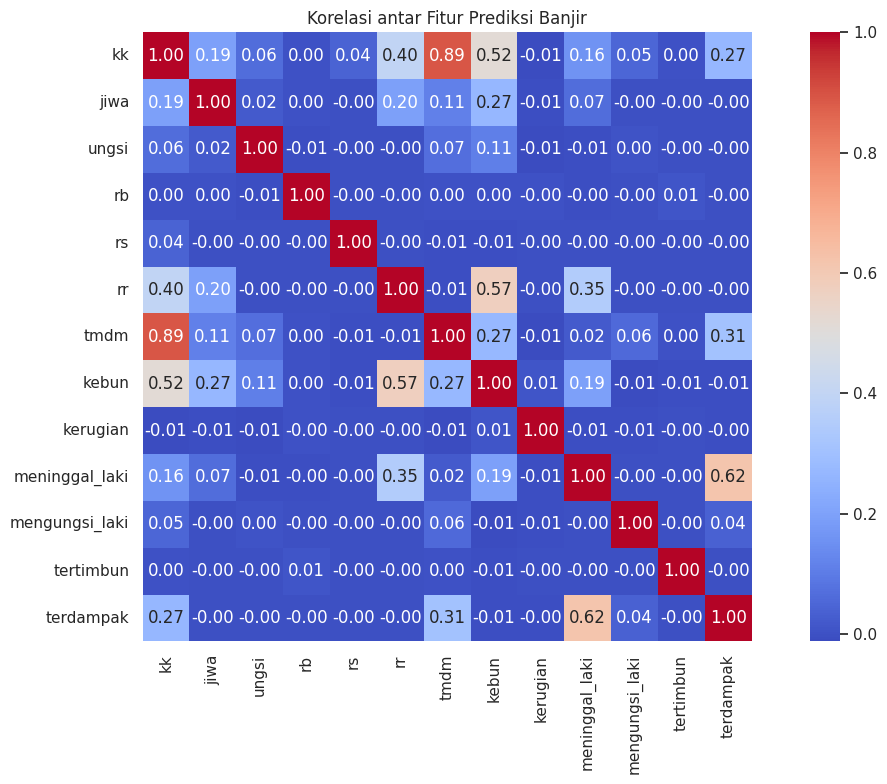

In [43]:
#Korelasi Antar Fitur Penting
kolom_korelasi = [
    'kk', 'jiwa', 'ungsi',
    'rb', 'rs', 'rr', 'tmdm',
    'kebun', 'kerugian',
    'meninggal_laki', 'mengungsi_laki',
    'tertimbun', 'terdampak'
]

# Filter hanya kolom yang tersedia di dataset
kolom_ada = [col for col in kolom_korelasi if col in df.columns]

# Hitung korelasi
corr_matrix = df[kolom_ada].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korelasi antar Fitur Prediksi Banjir')
plt.tight_layout()
plt.show()

Korelasi kuat
*   kk + tmdm = 0.89

    Semakin banyak kepala keluarga (KK), semakin besar total terdampak (tmdm). Ini masuk akal karena tmdm kemungkinan akumulasi dari rumah/KK terdampak.
*   rr + kebun = 0.57

    Terdapat keterkaitan antara rumah rusak (rr) dengan luas kebun terdampak, bisa jadi wilayah rawan banjir banyak berada di area perkebunan.

*   tertimbun + terdampak = 0.62

    Wilayah yang mengalami penimbunan banjir juga cenderung mencatat dampak luas (dalam artian wilayah atau unit lain ikut terkena dampak).

Korelasi Menengah
*   kk + kebun = 0.52

    Wilayah dengan KK besar mungkin berada di daerah produktif (banyak kebun).
*   kk + rr = 0.40

    Jumlah rumah rusak meningkat dengan jumlah KK yang besar, walaupun tidak sekuat relasi ke tmdm.

Korelasi Lemah

*   Kerugian tidak berkorelasi signifikan dengan variabel manapun

    Nilai kerugian mungkin dipengaruhi oleh variabel eksternal (seperti nilai aset atau kategori bencana) yang tidak tersedia atau bersifat acak di dataset ini.





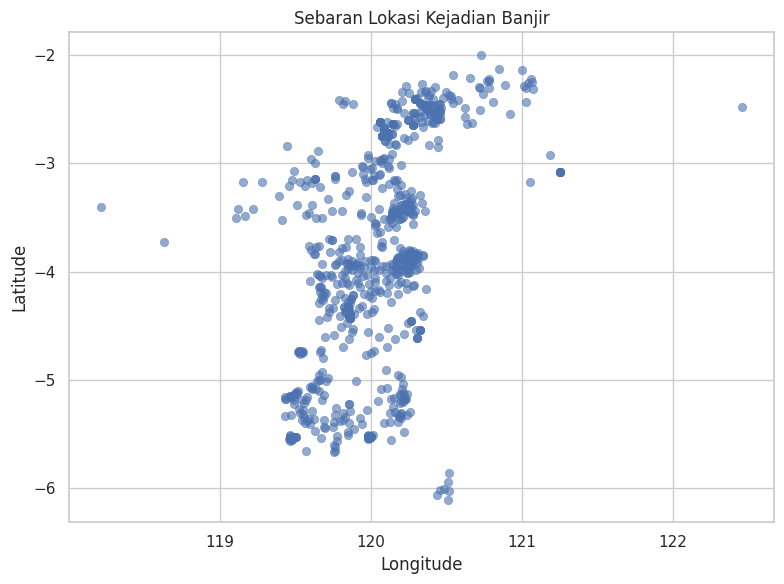

In [44]:
#Visualisasi Sebaran Lokasi Banjir
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='lng', y='lat',
    alpha=0.6, edgecolor=None
)
plt.title('Sebaran Lokasi Kejadian Banjir')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

Sebaran Lokasi Banjir
*   Titik-titik banjir tersebar merata di seluruh wilayah Sulawesi Selatan, mengikuti garis vertikal (longitude sekitar 120°).
*   Terlihat ada konsentrasi kejadian di bagian tengah dan selatan, kemungkinan wilayah padat penduduk seperti Makassar, Gowa, atau Luwu.
*   Distribusi spasial ini menunjukkan bahwa banjir adalah fenomena yang meluas, tidak terlokalisasi di satu daerah tertentu saja.






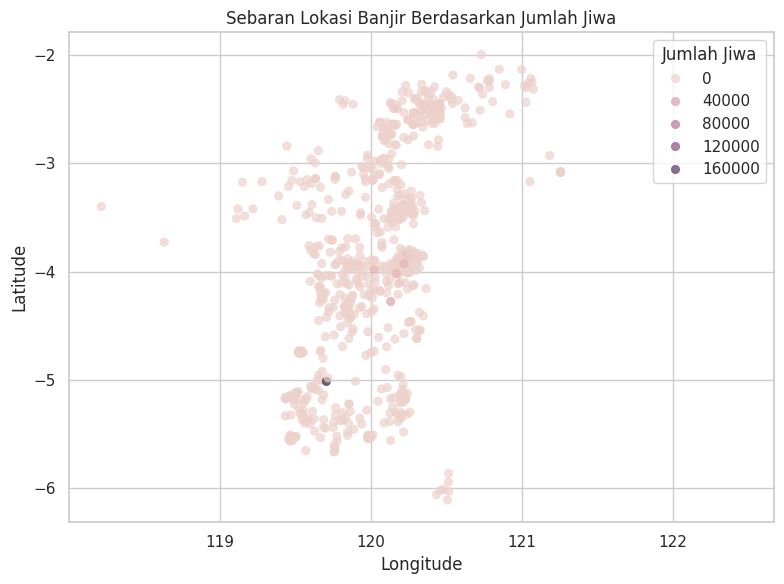

In [45]:
#Visualisasi Spasial dengan Warna Berdasarkan Dampak
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='lng', y='lat',
    hue='jiwa', alpha=0.7, edgecolor= None
)
plt.title('Sebaran Lokasi Banjir Berdasarkan Jumlah Jiwa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Jumlah Jiwa', loc='upper right')
plt.tight_layout()
plt.show()

Berdasarkan Jumlah Jiwa Terdampak
*   Meskipun sebagian besar titik berwarna pucat (jumlah jiwa rendah), ada satu titik gelap pekat (di sekitar -5°, 120°), yang menandakan kejadian banjir dengan jumlah terdampak sangat besar (mungkin >100.000 jiwa).
*   Ini bisa jadi outlier signifikan dan perlu disorot dalam dashboard atau analisis lanjutan.
*   Sebaran ini juga mendukung bahwa jumlah jiwa tidak selalu sebanding dengan frekuensi kejadian, melainkan bisa sangat tinggi hanya pada beberapa titik.



<ipython-input-46-b4bbe419bc9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_penyebab.index, x=top_penyebab.values, palette='rocket')


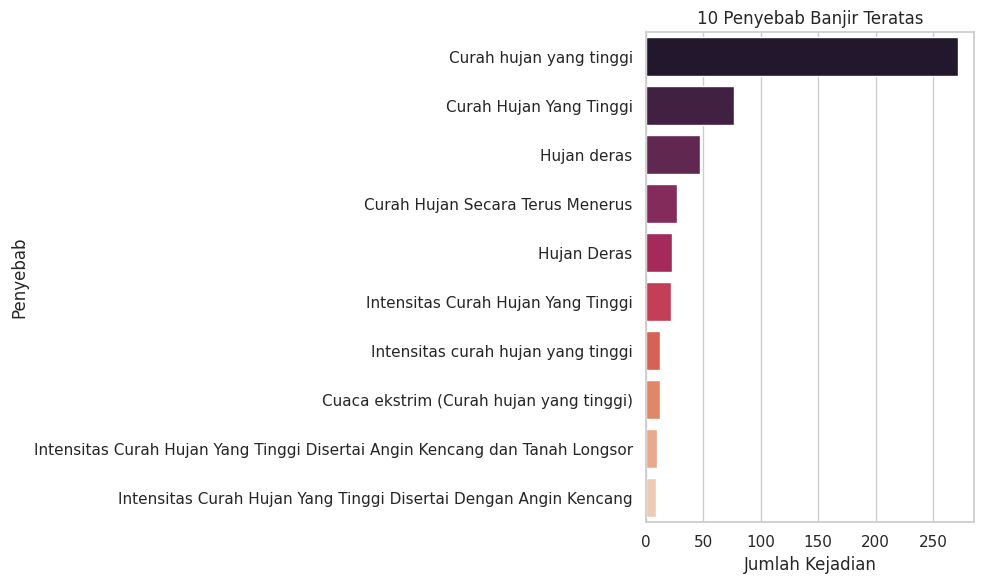

In [46]:
# Ambil 10 penyebab banjir paling sering
top_penyebab = df['penyebab'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_penyebab.index, x=top_penyebab.values, palette='rocket')
plt.title('10 Penyebab Banjir Teratas')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Penyebab')
plt.tight_layout()
plt.show()

10 Penyebab Banjir Teratas
*   Penyebab banjir dominan adalah  
    "Curah hujan yang tinggi" dan variannya, seperti:

    "Curah Hujan Yang Tinggi" (huruf besar kecil)

    "Hujan deras", "Hujan Deras"

    "Intensitas Curah Hujan Yang Tinggi"
*   Terjadi redundansi data karena perbedaan ejaan atau kapitalisasi.
*   Secara keseluruhan, lebih dari 80% kejadian banjir dipicu oleh faktor meteorologis, yaitu hujan ekstrem dan curah hujan tinggi.
*   Penyebab kompleks seperti "Curah Hujan Disertai Angin Kencang dan Longsor" mulai muncul di peringkat bawah.



In [47]:
# Contoh simplifikasi dengan kategori
def kategorisasi_penyebab(text):
    text = text.lower()
    if 'hujan' in text:
        return 'Curah Hujan Tinggi'
    elif 'longsor' in text:
        return 'Longsor'
    elif 'angin' in text:
        return 'Angin Kencang'
    elif 'cuaca' in text:
        return 'Cuaca Ekstrem'
    else:
        return 'Lainnya'

df['penyebab_kategori'] = df['penyebab'].apply(kategorisasi_penyebab)


<ipython-input-48-1d8a76f72b01>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_counts.values, y=kategori_counts.index, palette='magma')


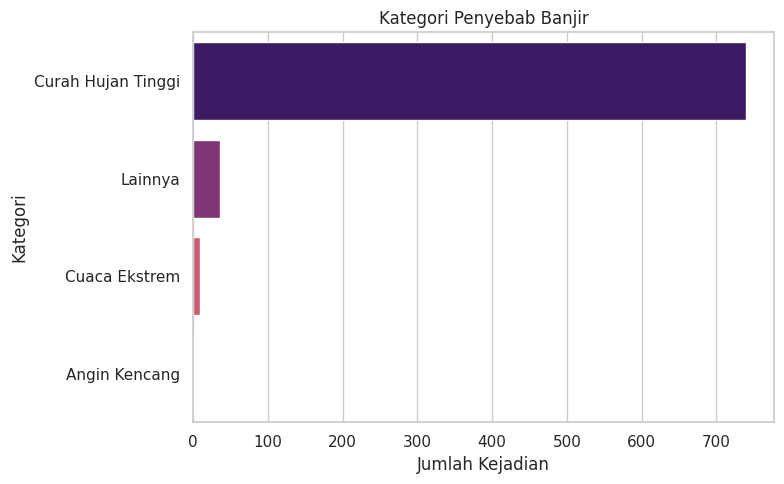

In [48]:
# Hitung jumlah kejadian per kategori penyebab
kategori_counts = df['penyebab_kategori'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=kategori_counts.values, y=kategori_counts.index, palette='magma')
plt.title('Kategori Penyebab Banjir')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()

Penyebab Banjir
*   Curah Hujan Tinggi mendominasi sebagai penyebab banjir dengan lebih dari 700 kejadian, menjadikannya faktor utama yang paling perlu dimonitor dan diprediksi dalam sistem peringatan dini.
*   Kategori lain seperti Cuaca Ekstrem, Angin Kencang, dan Lainnya memiliki jumlah kejadian yang jauh lebih sedikit, masing-masing hanya puluhan kasus.
*   Kategori Lainnya masih cukup besar, yang menunjukkan perlunya pembersihan atau pengelompokan lanjutan terhadap teks penyebab yang belum terklasifikasi.



<ipython-input-49-d1693b76e308>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_kerusakan.values, y=total_kerusakan.index, palette="viridis")


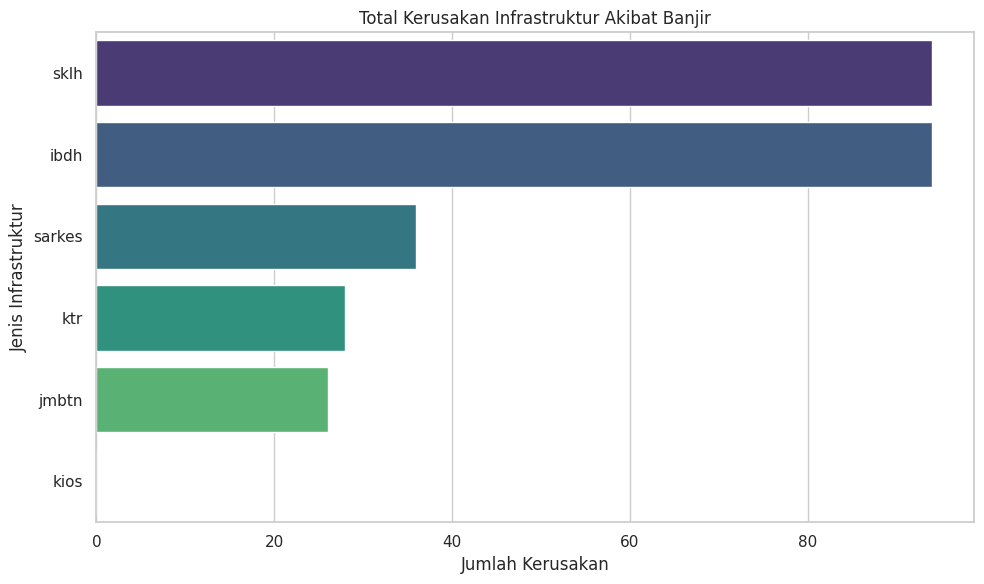

In [49]:
# Daftar kolom yang mewakili jenis infrastruktur
infrastruktur_cols = ['sklh', 'ibdh', 'sarkes', 'ktr', 'kios', 'jmbtn']

# Filter kolom yang dibutuhkan
df_infra = df[infrastruktur_cols]

# Hitung total kerusakan per jenis
total_kerusakan = df_infra.sum().sort_values(ascending=False)

# Visualisasi bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=total_kerusakan.values, y=total_kerusakan.index, palette="viridis")
plt.title("Total Kerusakan Infrastruktur Akibat Banjir")
plt.xlabel("Jumlah Kerusakan")
plt.ylabel("Jenis Infrastruktur")
plt.tight_layout()
plt.show()

Total Kerusakan Infrastruktur akibat Banjir

*   Jembatan (jmbtn) tercatat sebagai infrastruktur yang paling banyak mengalami kerusakan.
*   Disusul olek kios, kantor (ktr) dan sarkes (sarana kesehatan).
*   Sekolah (sklh) dan tempat ibadah (ibdh) juga terdampak, meskipun jumlahnya sedikit lebih rendah.

<ipython-input-50-66b060252576>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_korban.index, y=total_korban.values, palette="rocket")


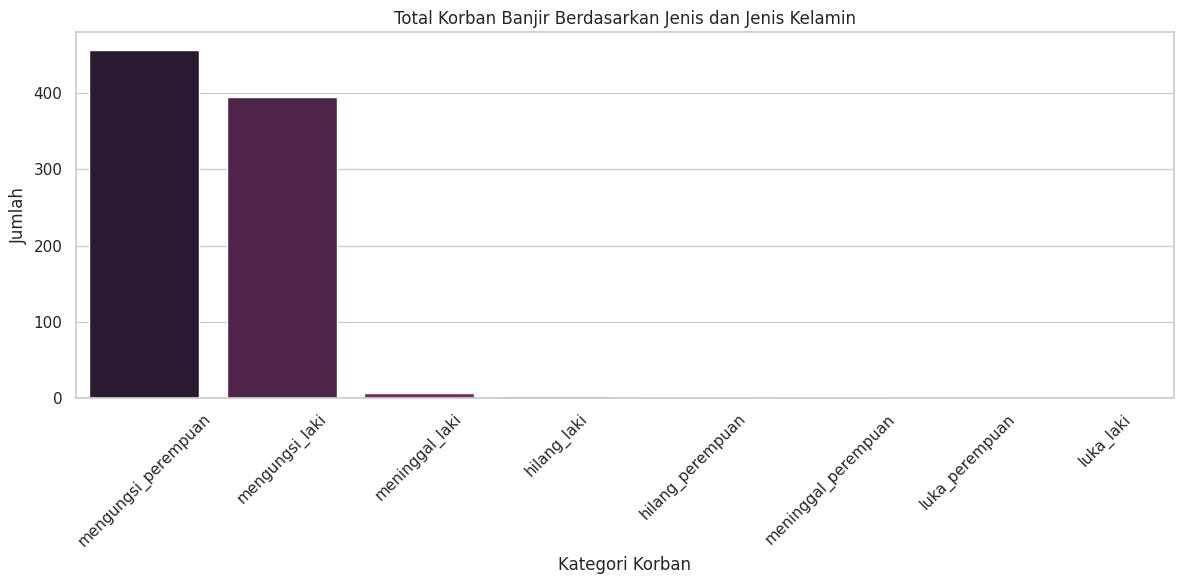

In [50]:
# Daftar kolom yang merepresentasikan jenis korban banjir
korban_cols = [
    'meninggal_laki', 'meninggal_perempuan',
    'hilang_laki', 'hilang_perempuan',
    'luka_laki', 'luka_perempuan',
    'mengungsi_laki', 'mengungsi_perempuan'
]

# Ambil data korban
df_korban = df[korban_cols]

# Hitung total jumlah korban dari masing-masing kategori
total_korban = df_korban.sum().sort_values(ascending=False)

# Plot visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=total_korban.index, y=total_korban.values, palette="rocket")
plt.title("Total Korban Banjir Berdasarkan Jenis dan Jenis Kelamin")
plt.xlabel("Kategori Korban")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Korban Banjir berdasarkan jenis kelamin

*   Mengungsi laki-laki dan perempuan mendominasi jumlah korban, menunjukkan skala evakuasi besar.
*   Disusul oleh kategori luka, lalu hilang dan meninggal, masing-masing lebih kecil proporsinya.
*   Distribusi antara laki-laki dan perempuan relatif seimbang.

<ipython-input-51-cdf40140248c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_kab_kerugian.values, y=df_kab_kerugian.index, palette="mako")


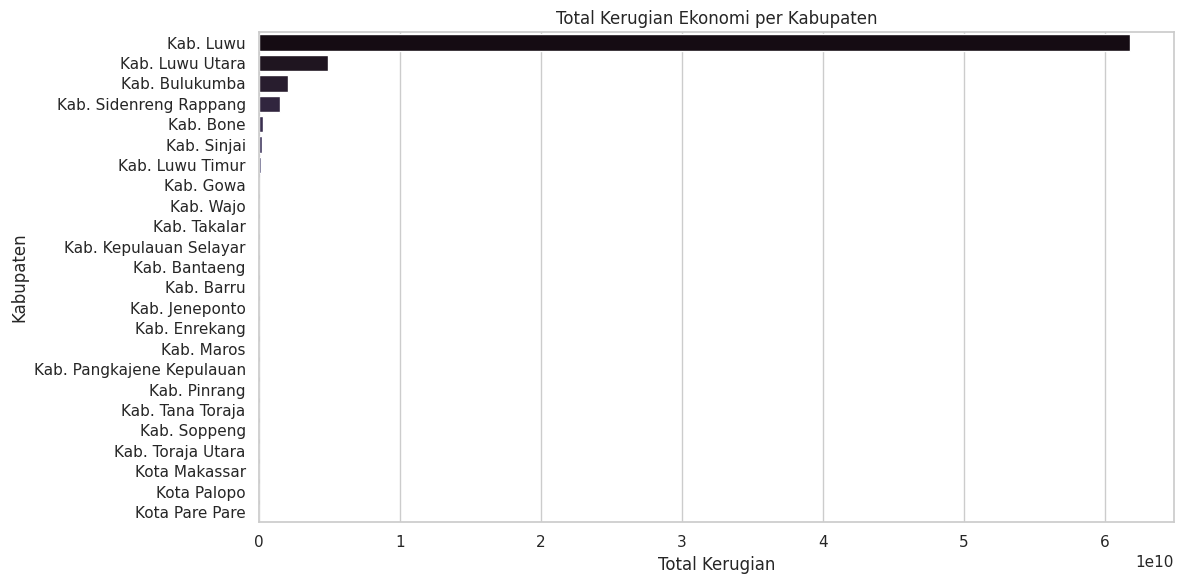

In [51]:
#Total kerugian ekonomi per kabupaten
plt.figure(figsize=(12, 6))
df_kab_kerugian = df.groupby("kab")["kerugian"].sum().sort_values(ascending=False)
sns.barplot(x=df_kab_kerugian.values, y=df_kab_kerugian.index, palette="mako")
plt.title("Total Kerugian Ekonomi per Kabupaten")
plt.xlabel("Total Kerugian")
plt.ylabel("Kabupaten")
plt.tight_layout()
plt.show()

Total Kerugian ekonomi per Kabupaten



*   Kabupaten Luwu mencatat kerugian ekonomi yang jauh lebih besar dibandingkan kabupaten lainnya. Ini mengindikasikan adanya kejadian banjir besar atau area penting yang terdampak (misalnya pusat ekonomi, infrastruktur utama).
*   Kabupaten Luwu Utara, Bulukumba, dan Sidrap juga memiliki nilai kerugian cukup tinggi.
*   Sebagian besar kabupaten lainnya memiliki kerugian relatif kecil, bahkan mendekati nol.

<ipython-input-52-58570cb139d2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')


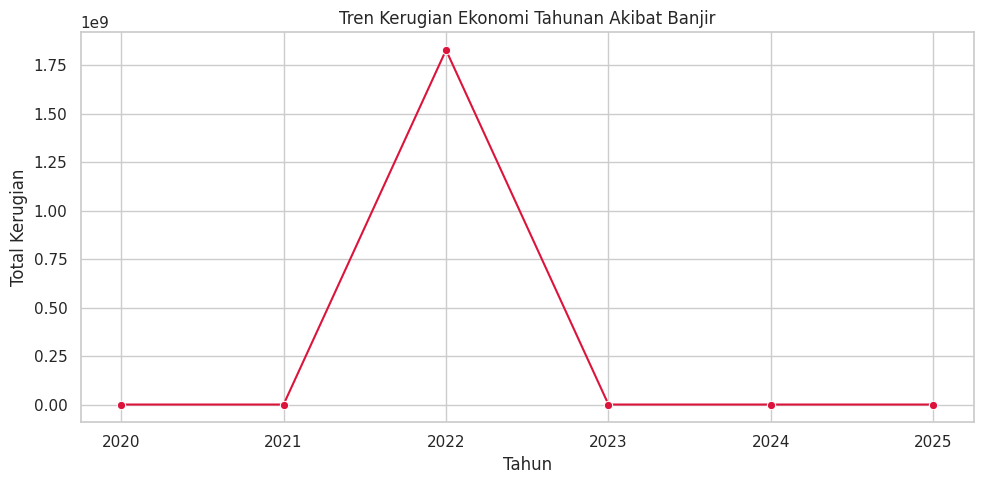

In [52]:
# Pastikan 'tanggal' bertipe datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Ekstrak tahun jika belum ada
df['tahun'] = df['tanggal'].dt.year

# Kelompokkan berdasarkan tahun
df_tahunan = df.dropna(subset=["tahun", "kerugian"])
df_tahunan = df_tahunan.groupby("tahun")["kerugian"].sum()

# Visualisasi tren
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_tahunan.index, y=df_tahunan.values, marker="o", color='crimson')
plt.title("Tren Kerugian Ekonomi Tahunan Akibat Banjir")
plt.xlabel("Tahun")
plt.ylabel("Total Kerugian")
plt.grid(True)
plt.tight_layout()
plt.show()

Tren Kerugian Ekonomi Akibat Banjir



*   Tahun 2022 merupakan puncak tertinggi kerugian ekonomi akibat banjir.
*   Tahun-tahun lainnya (2020, 2021, 2023–2025) menunjukkan hampir tidak ada kerugian tercatat, yang mungkin disebabkan tidak adanya kejadian besar dan fokus pelaporan pada tahun-tahun kritis

<ipython-input-53-1fdfe973f977>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bulan', palette='Blues')


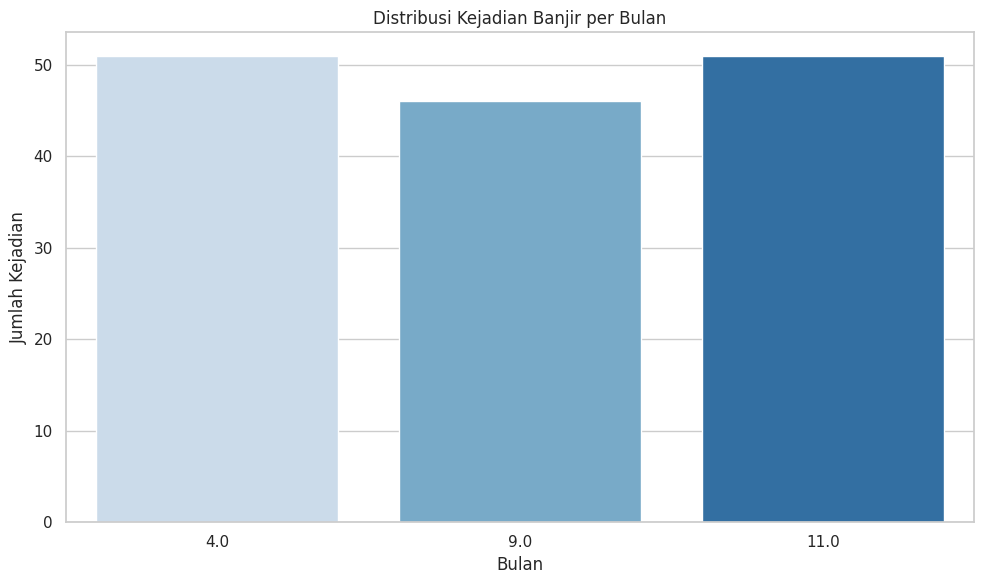

In [53]:
#Distribusi Kejadian Banjir per Bulan
# Pastikan kolom tanggal sudah dalam format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Ekstrak bulan dari tanggal
df['bulan'] = df['tanggal'].dt.month

# Plot distribusi kejadian per bulan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bulan', palette='Blues')
plt.title("Distribusi Kejadian Banjir per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kejadian")
plt.tight_layout()
plt.savefig("bulan.png")
plt.show()


Distribusi Kejadian Banjir per Bulan

*   Kejadian banjir paling banyak tercatat pada bulan April (4), September (9), dan November (11).
*   Hal ini menunjukkan adanya pola musiman—banjir cenderung meningkat pada awal dan akhir tahun hujan.
*   Implikasi untuk web prediksi:
Fitur waktu seperti bulan dapat digunakan dalam model prediktif untuk mengantisipasi puncak risiko banjir.